In [25]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2022-10-14 14:41:19.106863


100% | ETA:  0:00:00 | Calculating - Locked X (Locking steps tried 11/10000)   

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 78.4151 seconds

--- Output info ---

Run date and time: 2022-10-14 14:41:19.106862
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0003 800']
QPDrefl1 : min = -2.433224439966730e-04 max = 3.467442476848350e-07
QPDrefl2 : min = 0.000000000000000e+00 max = 2.364088331664430e-04
PDrefl   : min = -9.188212284276920e-09 max = 9.999520539990670e-09
circ     : min = 2.823128873511450e-01 max = 1.059752170225710e+04
trans    : min = 2.823128873511450e-06 max = 1.059752170225710e-01
z        : min = 0.000000000000000e+00 max = 8.010511541399779e+01


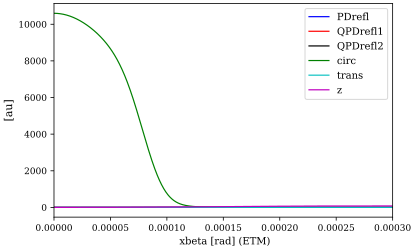

In [26]:
kat4 = finesse.kat()
kat4.verbose=True
kat4.parse("""


mod EOM 55.55M 0.001 1 pm nin n0                #modulator
l laser 30 0 nin                                # input laser                  
maxtem 3                

s s0 0 n0 n1


##### QPDs ##########
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3           #bs to split power between detectors and main cavity  ##Setup-> http://www.gwoptics.org/finesse/examples/autoalignment.php ##
s s1 0.1 n2 n4                  
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump            #bs to split power between two detectors 
s sQPD1 0.1 n9 n11                   
s sQPD2 0.1 n10 n12    

attr s2 g 45                                 #guoy phase for det1
attr sQPD1 g 0                                 #guoy phase for det1
attr sQPD2 g 90                                #guoy phase for det2

pd1 QPDrefl1 55.55M 90 n11                       #Split detector1 refl
pdtype QPDrefl1 x-split   
pd1 QPDrefl2 55.55M 90 n12                       #Split detector2 refl
pdtype QPDrefl2 x-split   

##################

###### ARM #######
m ITM 0.98997 0.01 0 n4 n5               
s scavity 3.3 n5 n6                   
m ETM 0.99996 0.00001 0 n6 n7               
s s2 0.1 n3 n8                       
##################



              
cav cavity ITM n5 ETM n6 
trace 2                  

##### attr ######
attr ETM Rc 11.3         
attr ETM xbeta 0         
attr ITM xbeta 0 
###############



pd1 PDrefl 55.55M 0 n8*                         # refl
pd circ n5                                      #circ power#
pd trans n7

                                        ### cavity lock ###
set err PDrefl re    
lock z $err 3000 10n 
put ETM phi $z       
noplot z   



xaxis ETM xbeta lin 0 0.3m 800 
#xaxis ETM xbeta lin 0 0.3m 800              #rotate ETM mrad  
#func rot = $x1*(1)
#put ITM xbeta $rot                              #rotate ITM with the same value, multiply (-1) for hard mode 

#x2axis ITM xbeta lin -0.3m 0.3m 800            #for 3d graph plotting

""")
out3 = kat4.run()
out3.info()
out3.plot()



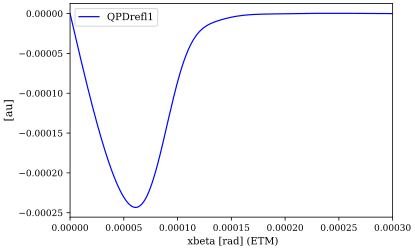

In [27]:
out3.plot(['QPDrefl1'])

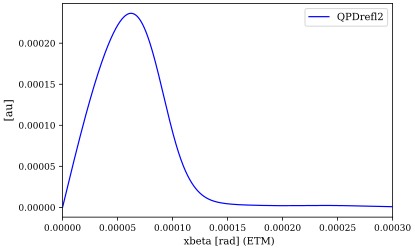

In [28]:
out3.plot(['QPDrefl2'])

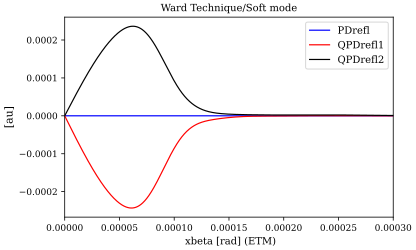

In [29]:
out3.plot(['QPDrefl1','QPDrefl2','PDrefl'],title='Ward Technique/Soft mode')

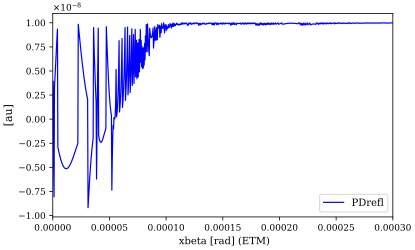

In [30]:
out3.plot(['PDrefl'])

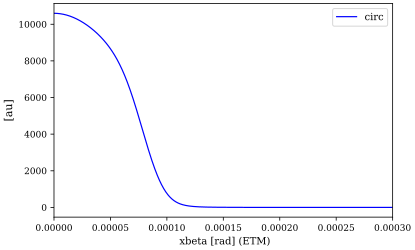

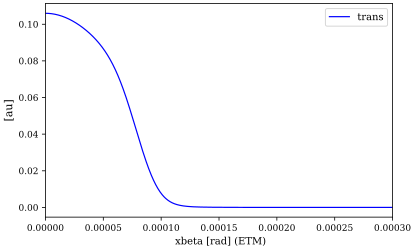

In [31]:
out3.plot(['circ'])
out3.plot(['trans'])

In [32]:
## for 3d plotting ##

#plt.figure(figsize = (80,8))
#plt.imshow(out3['QPDrefl1'],cmap='gray',interpolation='nearest')
#plt.colorbar()
#plt.show()
#plt.figure(figsize = (80,8))
#plt.imshow(out3['QPDrefl2'],cmap='gray',interpolation='nearest')
#plt.colorbar()
#plt.show()
#plt.figure(figsize = (80,8))
#plt.imshow(out3['circ'],cmap='jet')
#plt.colorbar()
#plt.show()

i=0
for i in range(90):
    kat4.sQPD2.gouy = i+90
    kat4.sQPD1.gouy = i
    i = i+40
    out3 = kat4.run()
    out3.info()
    out3.plot(['QPDrefl1','QPDrefl2','PDrefl'],title='Ward Technique/Soft mode')
    

print(kat4.sQPD2.gouy)

for M in range(10,180,20):
    kat4.parse("""
    attr s2 g {f}
    #attr sQPD2 g {g} """.format(f=M,g=M+90))
    out3 = kat4.run()
    #out3.info()
    plt.plot(out3.x,out3['QPDrefl1'])
    plt.plot(out3.x,out3['QPDrefl2'])
    plt.legend(["QPDrefl1", "QPDrefl2"], loc ="lower right")
    plt.title('Ward Technique/Soft mode/QPD1'+str(M))
    plt.xlabel("Misalignment mrad")
    plt.ylabel("Error Signal")
    plt.savefig(str(M)+'Ward Technique_Soft_mode_new.png')
    plt.show()
    plt.clf()
